In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder,RobustScaler,MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/luminar data/predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
print("Shape of the dataset:",df.shape)


Shape of the dataset: (10000, 10)


In [ ]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [ ]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

There are no missing values in the dataset

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

**Exploratory Data Analysis**

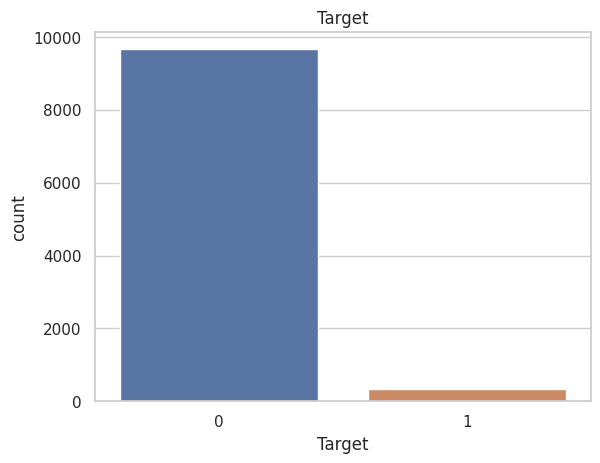

In [ ]:
sns.set_theme(style='whitegrid')
plt.title("Target")
sns.countplot(x=df['Target'])
plt.show()

The data is imbalanced

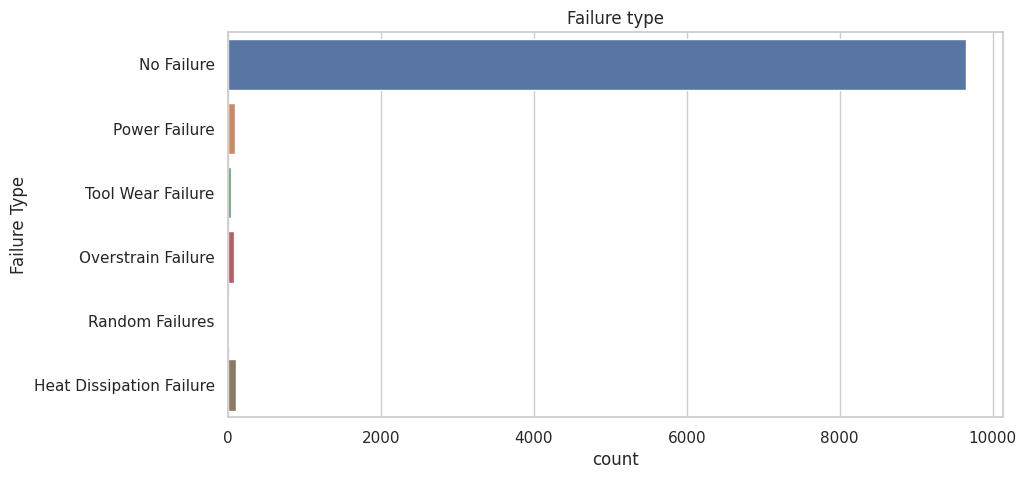

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Failure type")
sns.countplot(data=df,y='Failure Type')
plt.show()

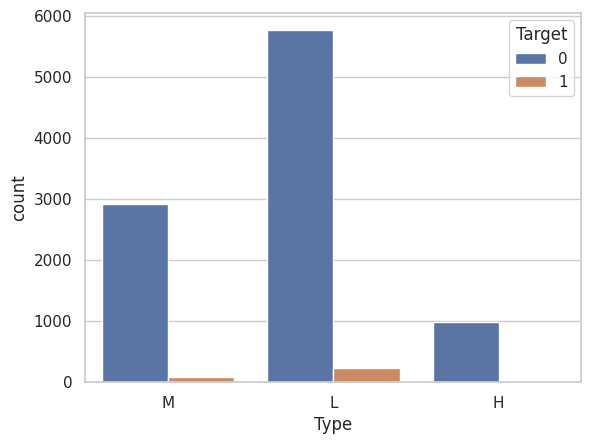

In [ ]:
sns.countplot(x = 'Type',hue = 'Target' ,data =df)
plt.show()

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


<Axes: xlabel='Target', ylabel='Rotational speed [rpm]'>

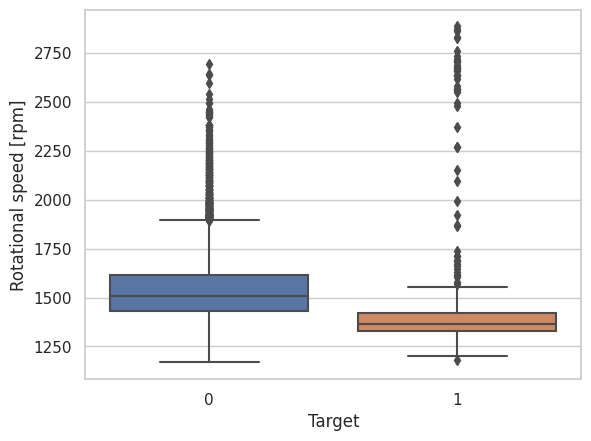

In [ ]:
sns.boxplot(y = 'Rotational speed [rpm]' ,x = 'Target' ,data = df)

Presence of out layers is more in this particular coloumn

<Axes: xlabel='Target', ylabel='Torque [Nm]'>

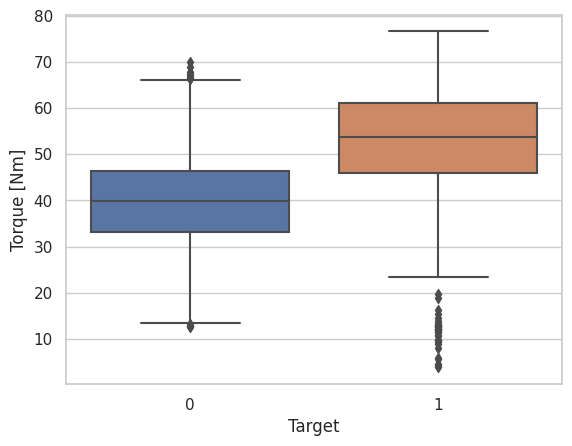

In [ ]:
sns.boxplot(y ='Torque [Nm]' ,x = 'Target' ,data = df)

<Axes: xlabel='Target', ylabel='Tool wear [min]'>

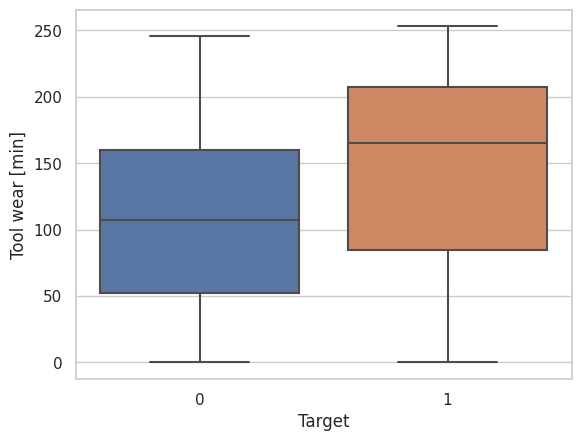

In [ ]:
sns.boxplot(y ='Tool wear [min]' ,x = 'Target' ,data = df)

<Axes: >

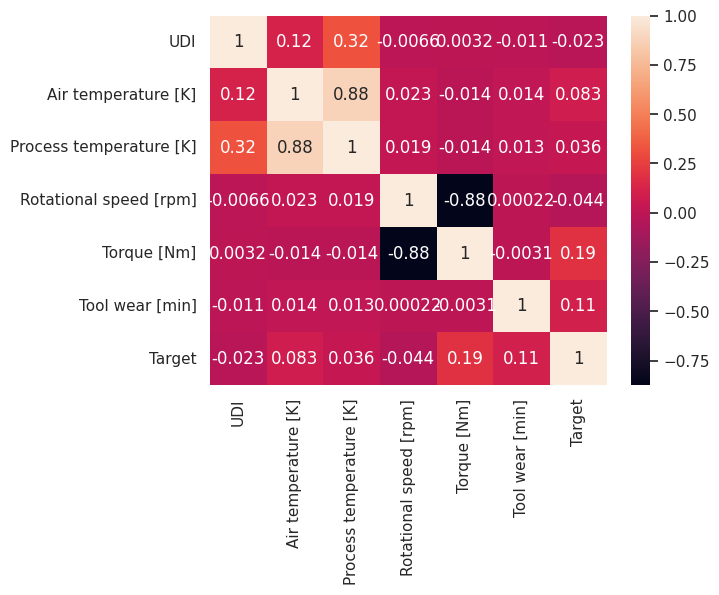

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='count', ylabel='Type'>

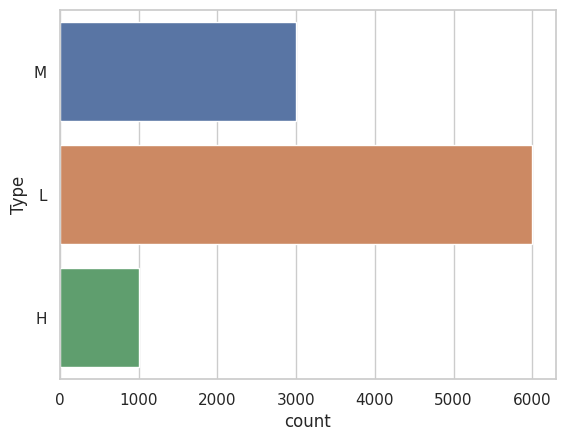

In [ ]:
sns.countplot(data=df,y='Type')

Most of the Machines are L-type=Linotype Machines then
M-Type=Motor type machines then
H-Type=Power Press Machines

**Preprocessing**


In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:

df['Type']=df['Type'].map({'L':3,'M':2,'H':1})


In [ ]:
df['Type'].value_counts()

3    6000
2    2997
1    1003
Name: Type, dtype: int64

In [ ]:
X=df.drop(['Failure Type','UDI', 'Product ID','Target'],axis=1)
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,3,298.2,308.7,1408,46.3,3
2,3,298.1,308.5,1498,49.4,5
3,3,298.2,308.6,1433,39.5,7
4,3,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,1,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,1,299.0,308.7,1408,48.5,25


In [ ]:
y=df["Target"]

In [ ]:
X.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

**Resampling and ModelBuilding**


In [ ]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN
ad=ADASYN(random_state=0)
X_os,y_os=ad.fit_resample(X,y)

In [ ]:
X_os

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.100000,308.600000,1551,42.800000,0
1,3,298.200000,308.700000,1408,46.300000,3
2,3,298.100000,308.500000,1498,49.400000,5
3,3,298.200000,308.600000,1433,39.500000,7
4,3,298.200000,308.700000,1408,40.000000,9
...,...,...,...,...,...,...
19225,3,300.478013,311.758340,1367,58.019194,190
19226,3,301.487591,310.099731,1361,58.017444,159
19227,3,300.030942,310.911258,1366,60.442790,186
19228,3,298.595567,308.253191,1360,67.876419,172


In [ ]:
y_os.value_counts()

0    9661
1    9569
Name: Target, dtype: int64

Scaling

In [ ]:
#Here we use RobustScaler beacause the presence of outliers is high
rbs=RobustScaler()
X_os_scaled=rbs.fit_transform(X_os)
X_os_scaled

array([[-1.        , -0.75552375, -0.93069209,  0.64766839, -0.21612442,
        -1.        ],
       [ 0.        , -0.7253028 , -0.87689655, -0.09326425, -0.01829381,
        -0.97619048],
       [ 0.        , -0.75552375, -0.98448763,  0.37305699,  0.15692758,
        -0.96031746],
       ...,
       [ 0.        , -0.17197484,  0.31266156, -0.31088083,  0.78109955,
         0.47619048],
       [ 0.        , -0.60575858, -1.11725963, -0.34196891,  1.20127078,
         0.36507937],
       [ 0.        , -0.06618463,  0.66946788, -0.30569948,  0.67383741,
         0.5       ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_os_scaled,y_os,test_size=0.2,random_state=1)


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

sv=SVC()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)


In [ ]:
print(" KNeighbors:",classification_report(y_test,y_pred_knn))
print("Support Vector Machine:",classification_report(y_test,y_pred_sv))
print("DecisionTree:",classification_report(y_test,y_pred_dt))
print("RandomForest:",classification_report(y_test,y_pred_rf))
print("Adaboost:",classification_report(y_test,y_pred_ad))

 KNeighbors:               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1978
           1       0.91      0.99      0.95      1868

    accuracy                           0.95      3846
   macro avg       0.95      0.95      0.95      3846
weighted avg       0.95      0.95      0.95      3846

Support Vector Machine:               precision    recall  f1-score   support

           0       0.97      0.89      0.93      1978
           1       0.89      0.97      0.93      1868

    accuracy                           0.93      3846
   macro avg       0.93      0.93      0.93      3846
weighted avg       0.93      0.93      0.93      3846

DecisionTree:               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1978
           1       0.95      0.97      0.96      1868

    accuracy                           0.96      3846
   macro avg       0.96      0.96      0.96      3846
weighted avg       0.96

ConfusionMatrix Kneighbors: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd680421a0>
ConfusionMatrix SVC: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd68041d80>
ConfusionMatrix DecsionTree: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd6675b160>
ConfusionMatrix Randomforest: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd680402b0>
ConfusionMatrix Adaboost: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd6672fdf0>


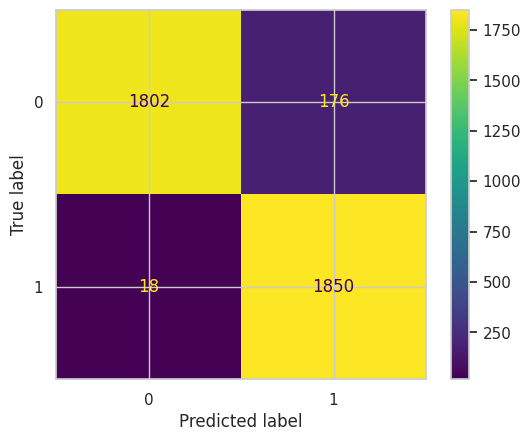

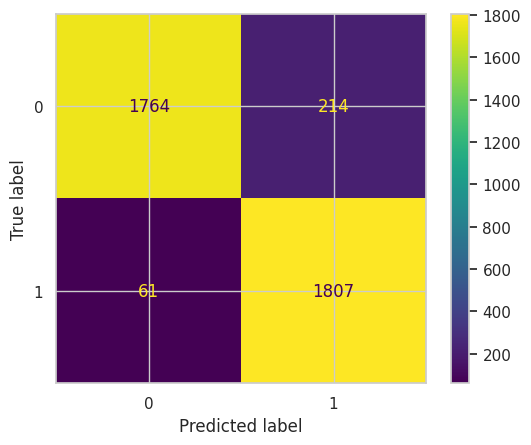

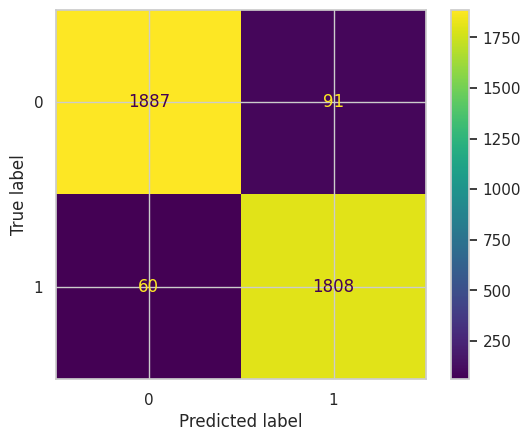

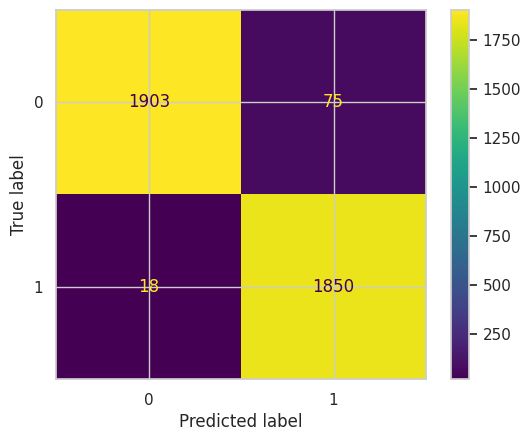

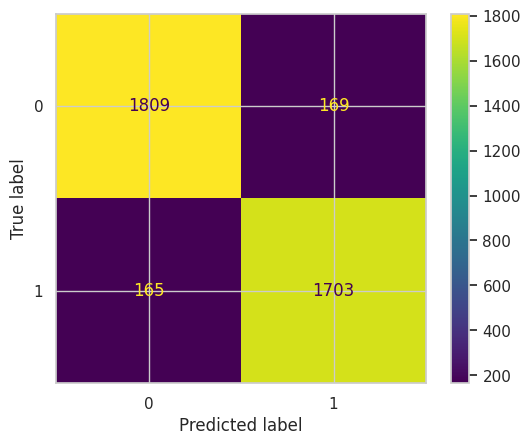

In [ ]:
print("ConfusionMatrix Kneighbors:",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))
print("ConfusionMatrix SVC:",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))
print("ConfusionMatrix DecsionTree:",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt))
print('ConfusionMatrix Randomforest:',ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))
print('ConfusionMatrix Adaboost:',ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ad))

UnderSampling

In [ ]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,3,298.2,308.7,1408,46.3,3
2,3,298.1,308.5,1498,49.4,5
3,3,298.2,308.6,1433,39.5,7
4,3,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,1,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,1,299.0,308.7,1408,48.5,25


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler()
X_us,y_us=rs.fit_resample(X,y)

In [ ]:
X_us

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,3,299.1,308.3,1426,40.1,60
1,2,297.9,307.4,1610,34.6,219
2,2,299.6,308.9,1685,27.8,161
3,3,303.5,311.9,1405,45.6,10
4,3,301.4,310.7,1616,36.5,121
...,...,...,...,...,...,...
673,3,298.6,309.8,2271,16.2,218
674,3,298.5,309.5,1294,66.7,12
675,3,298.5,309.4,1360,60.9,187
676,3,298.3,309.3,1337,56.1,206


In [ ]:
y_us.value_counts()

0    339
1    339
Name: Target, dtype: int64

In [ ]:
mn=MinMaxScaler()
X_scaled_us=mn.fit_transform(X_us)
X_scaled_us


array([[1.        , 0.41111111, 0.3164557 , 0.14369501, 0.49862637,
        0.23715415],
       [0.5       , 0.27777778, 0.20253165, 0.2516129 , 0.42307692,
        0.86561265],
       [0.5       , 0.46666667, 0.39240506, 0.29560117, 0.32967033,
        0.63636364],
       ...,
       [1.        , 0.34444444, 0.4556962 , 0.10498534, 0.78434066,
        0.73913043],
       [1.        , 0.32222222, 0.44303797, 0.0914956 , 0.71840659,
        0.81422925],
       [1.        , 0.35555556, 0.30379747, 0.10557185, 0.88461538,
        0.6798419 ]])

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_scaled_us,y_us,test_size=0.2,random_state=0)


In [ ]:
knn_us=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_us,y_train_us)
y_pred_knn_us=knn.predict(X_test_us)

sv_us=SVC()
sv_us.fit(X_train_us,y_train_us)
y_pred_sv_us=sv.predict(X_test_us)

dt_us=DecisionTreeClassifier()
dt_us.fit(X_train_us,y_train_us)
y_pred_dt_us=dt.predict(X_test_us)

rf_us=RandomForestClassifier()
rf_us.fit(X_train_us,y_train_us)
y_pred_rf_us=rf.predict(X_test_us)


ad_us=AdaBoostClassifier()
ad_us.fit(X_train_us,y_train_us)
y_pred_ad_us=ad_us.predict(X_test_us)


In [ ]:
print(" KNeighbors:",classification_report(y_test_us,y_pred_knn_us))
print("Support Vector Machine:",classification_report(y_test_us,y_pred_sv_us))
print("DecisionTree:",classification_report(y_test_us,y_pred_dt_us))
print("RandomForest:",classification_report(y_test_us,y_pred_rf_us))
print("Adaboost:",classification_report(y_test_us,y_pred_ad_us))

 KNeighbors:               precision    recall  f1-score   support

           0       0.88      0.89      0.88        63
           1       0.90      0.89      0.90        73

    accuracy                           0.89       136
   macro avg       0.89      0.89      0.89       136
weighted avg       0.89      0.89      0.89       136

Support Vector Machine:               precision    recall  f1-score   support

           0       0.82      0.44      0.58        63
           1       0.66      0.92      0.77        73

    accuracy                           0.70       136
   macro avg       0.74      0.68      0.67       136
weighted avg       0.73      0.70      0.68       136

DecisionTree:               precision    recall  f1-score   support

           0       0.63      0.57      0.60        63
           1       0.66      0.71      0.68        73

    accuracy                           0.65       136
   macro avg       0.64      0.64      0.64       136
weighted avg       0.65

ConfusionMatrix Kneighbors: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd66387370>
ConfusionMatrix SVC: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd66387e50>
ConfusionMatrix DecsionTree: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd663865c0>
ConfusionMatrix Randomforest: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd662dada0>
ConfusionMatrix Adaboost: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd6641ed70>


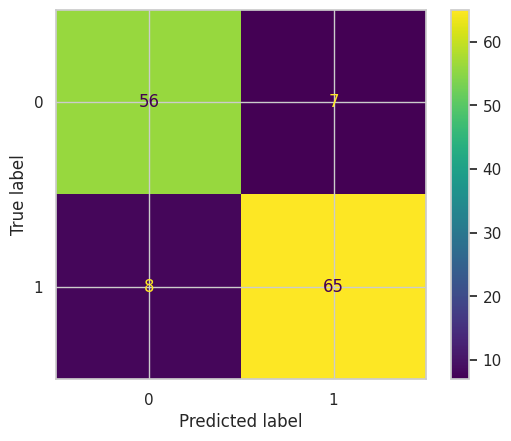

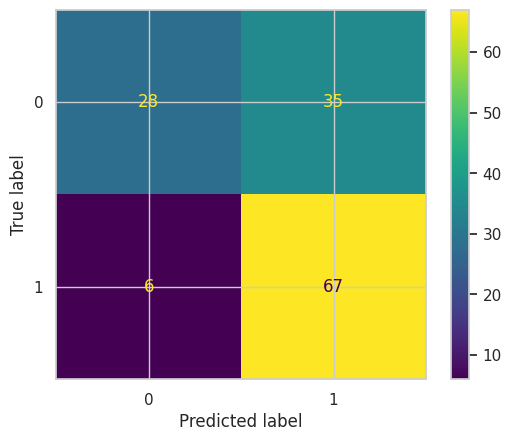

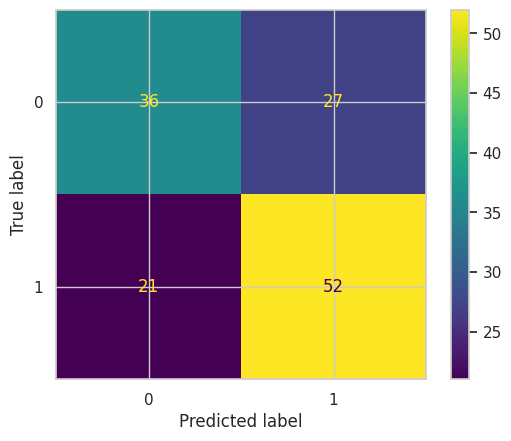

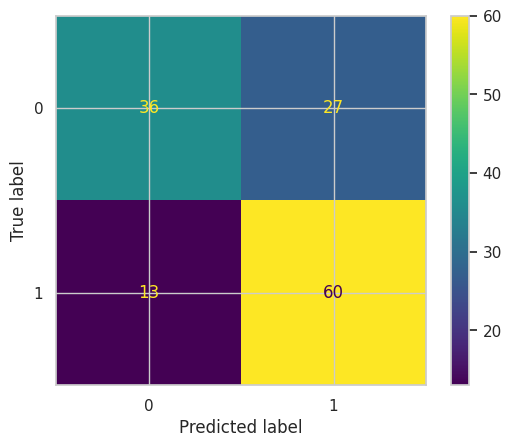

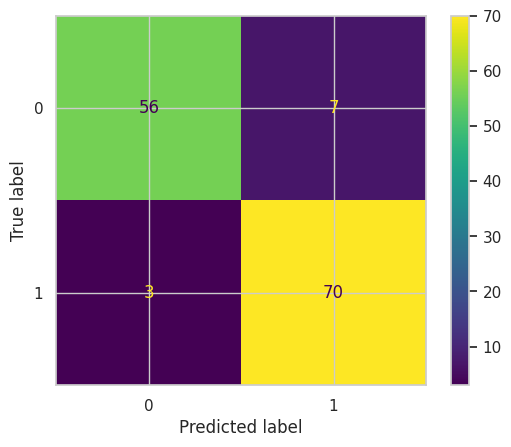

In [ ]:
print("ConfusionMatrix Kneighbors:",ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_knn_us))
print("ConfusionMatrix SVC:",ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_sv_us))
print("ConfusionMatrix DecsionTree:",ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_dt_us))
print('ConfusionMatrix Randomforest:',ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_rf_us))
print('ConfusionMatrix Adaboost:',ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_ad_us))

Feature Selection From Over sampled Dataset

In [ ]:
X_os

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.100000,308.600000,1551,42.800000,0
1,3,298.200000,308.700000,1408,46.300000,3
2,3,298.100000,308.500000,1498,49.400000,5
3,3,298.200000,308.600000,1433,39.500000,7
4,3,298.200000,308.700000,1408,40.000000,9
...,...,...,...,...,...,...
19225,3,300.478013,311.758340,1367,58.019194,190
19226,3,301.487591,310.099731,1361,58.017444,159
19227,3,300.030942,310.911258,1366,60.442790,186
19228,3,298.595567,308.253191,1360,67.876419,172


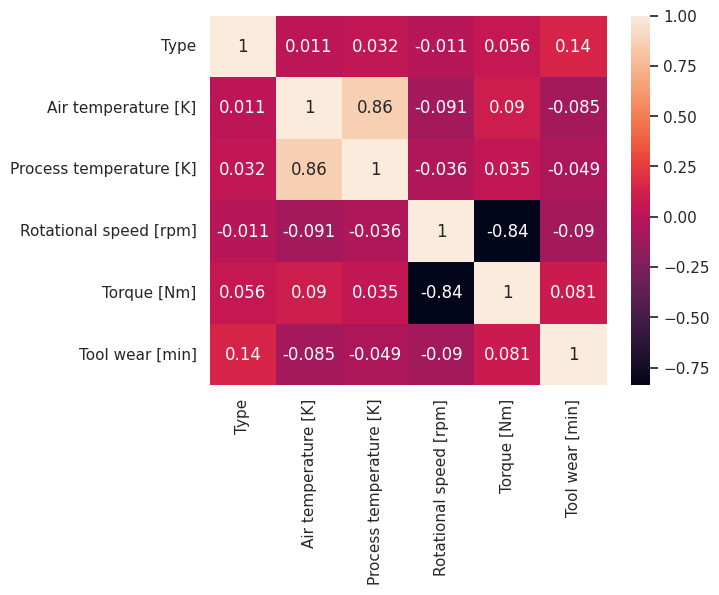

In [ ]:
sns.heatmap(X_us.corr(),annot=True)
plt.show()

Here columnsAir temperature [K],Process temperature [K] are highly correlated so we can remove either of the one columns

In [ ]:
X_os_ft=X_os.drop(['Process temperature [K]'],axis=1)
X_os_ft

,Type,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.100000,1551,42.800000,0
1,3,298.200000,1408,46.300000,3
2,3,298.100000,1498,49.400000,5
3,3,298.200000,1433,39.500000,7
4,3,298.200000,1408,40.000000,9
...,...,...,...,...,...
19225,3,300.478013,1367,58.019194,190
19226,3,301.487591,1361,58.017444,159
19227,3,300.030942,1366,60.442790,186
19228,3,298.595567,1360,67.876419,172


In [ ]:
rbs_ft=RobustScaler()
X_ft_scaled=rbs_ft.fit_transform(X_os_ft)

In [ ]:
X_train_ft,X_test_ft,y_train_ft,y_test_ft=train_test_split(X_ft_scaled,y_os,test_size=0.2,random_state=0)

In [ ]:
knn_ft=KNeighborsClassifier(n_neighbors=5)
knn_ft.fit(X_train_ft,y_train_ft)
y_pred_knn_ft=knn_ft.predict(X_test_ft)

sv_ft=SVC()
sv_ft.fit(X_train_ft,y_train_ft)
y_pred_sv_ft=sv_ft.predict(X_test_ft)

dt_ft=DecisionTreeClassifier()
dt_ft.fit(X_train_ft,y_train_ft)
y_pred_dt_ft=dt_ft.predict(X_test_ft)

rf_ft=RandomForestClassifier()
rf_ft.fit(X_train_ft,y_train_ft)
y_pred_rf_ft=rf_ft.predict(X_test_ft)

ad_ft=AdaBoostClassifier()
ad_ft.fit(X_train_ft,y_train_ft)
y_pred_ad_ft=ad_ft.predict(X_test_ft)


In [ ]:
print(" KNeighbors:",classification_report(y_test_ft,y_pred_knn_ft))
print("Support Vector Machine:",classification_report(y_test_ft,y_pred_sv_ft))
print("DecisionTree:",classification_report(y_test_ft,y_pred_dt_ft))
print("RandomForest:",classification_report(y_test_ft,y_pred_rf_ft))
print("Adaboost:",classification_report(y_test_ft,y_pred_ad_ft))

 KNeighbors:               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1933
           1       0.91      0.98      0.95      1913

    accuracy                           0.94      3846
   macro avg       0.95      0.94      0.94      3846
weighted avg       0.95      0.94      0.94      3846

Support Vector Machine:               precision    recall  f1-score   support

           0       0.95      0.87      0.91      1933
           1       0.88      0.96      0.92      1913

    accuracy                           0.91      3846
   macro avg       0.92      0.91      0.91      3846
weighted avg       0.92      0.91      0.91      3846

DecisionTree:               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1933
           1       0.94      0.96      0.95      1913

    accuracy                           0.95      3846
   macro avg       0.95      0.95      0.95      3846
weighted avg       0.95

ConfusionMatrix Kneighbors: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd6602de10>
ConfusionMatrix SVC: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd66069c00>
ConfusionMatrix DecsionTree: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd6602e080>
ConfusionMatrix Randomforest: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd6602ff40>
ConfusionMatrix Adaboost: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcd65ee0730>


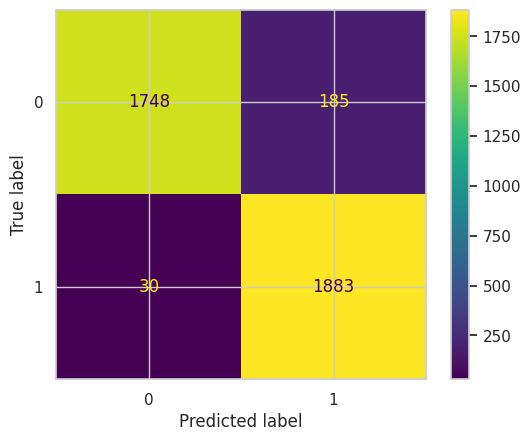

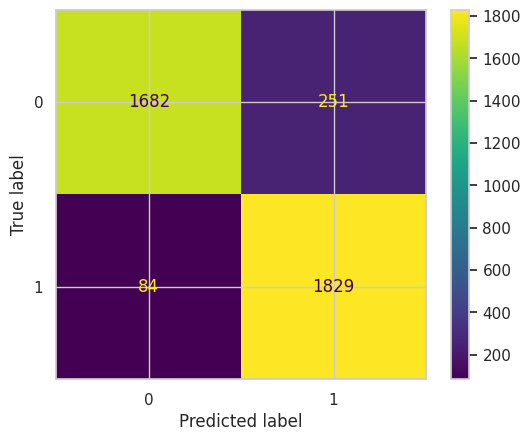

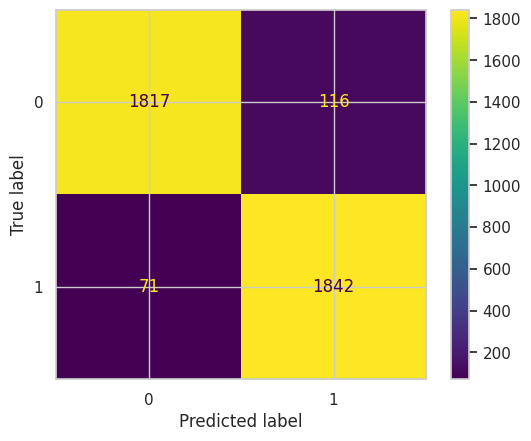

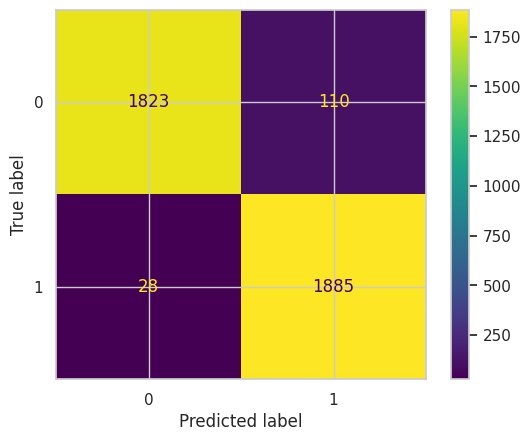

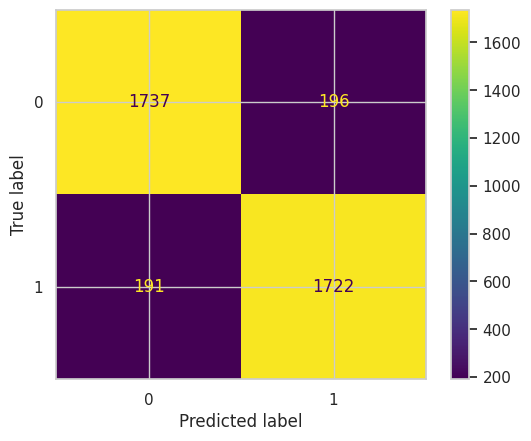

In [ ]:
print("ConfusionMatrix Kneighbors:",ConfusionMatrixDisplay.from_predictions(y_test_ft,y_pred_knn_ft))
print("ConfusionMatrix SVC:",ConfusionMatrixDisplay.from_predictions(y_test_ft,y_pred_sv_ft))
print("ConfusionMatrix DecsionTree:",ConfusionMatrixDisplay.from_predictions(y_test_ft,y_pred_dt_ft))
print('ConfusionMatrix Randomforest:',ConfusionMatrixDisplay.from_predictions(y_test_ft,y_pred_rf_ft))
print('ConfusionMatrix Adaboost:',ConfusionMatrixDisplay.from_predictions(y_test_ft,y_pred_ad_ft))

**Hyperparameter Tuning**

In [ ]:
#tuning on undersampled models
print("Decision Tree best Parametrs")
params_dt={'criterion':['gini', 'entropy', 'log_loss'],'splitter':['best','random'],'max_depth':[2,3,4,5,6,7,8,9],'min_samples_split':[1,2,3,4,5],'max_features':['sqrt', 'log2']}
grd_dt=GridSearchCV(dt_us,params_dt,cv=5,scoring='accuracy')
grd_dt.fit(X_train_us,y_train_us)
print("dt:",grd_dt.best_params_)

Decision Tree best Parametrs
dt: {'criterion': 'log_loss', 'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 4, 'splitter': 'best'}


In [ ]:
dt_us=DecisionTreeClassifier(criterion='entropy',max_depth=6, max_features= 'log2', min_samples_split= 4, splitter= 'best')
dt_us.fit(X_train_us,y_train_us)
y_pred_dt_hy=dt_us.predict(X_test_us)


In [ ]:
print(classification_report(y_test_us,y_pred_dt_hy))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        63
           1       0.96      0.88      0.91        73

    accuracy                           0.91       136
   macro avg       0.91      0.91      0.91       136
weighted avg       0.92      0.91      0.91       136



In [ ]:
print("SVC best Parametrs")
params_svc={'C':[1.0,2.0,3.0],'kernel':['linear', 'poly', 'rbf'],'degree':[2,3,4],'gamma':['scale','auto']}
grd_svc=GridSearchCV(sv_us,params_svc,cv=5,scoring='accuracy')
grd_svc.fit(X_train_us,y_train_us)
print("svc:",grd_svc.best_params_)

SVC best Parametrs
svc: {'C': 3.0, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
sv_us=SVC(C= 1.0, degree=4, gamma='scale', kernel='poly')
sv_us.fit(X_train_us,y_train_us)
y_pred_sv_hy=sv_us.predict(X_test_us)


In [ ]:
print(classification_report(y_test_us,y_pred_sv_hy))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.90      0.88      0.89        73

    accuracy                           0.88       136
   macro avg       0.88      0.88      0.88       136
weighted avg       0.88      0.88      0.88       136



In [ ]:
#Hyperparameter tuning on oversampled dataset
# print("SVC best Parametrs")
# params_svc={'C':[1.0,2.0,3.0],'kernel':['linear', 'poly', 'rbf'],'degree':[2,3,4],'gamma':['scale','auto']}
# grd_svc=GridSearchCV(sv,params_svc,cv=5,scoring='accuracy')
# grd_svc.fit(X_train,y_train)
# print("svc:",grd_svc.best_params_)


Prediction

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,3,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,3,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,3,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,3,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
#RandomForest over sampled
print("*************Internal predictions RandomForest(Over_sampling)***************")
rf_prediction=rf.predict(rbs.transform([[2,298.1,308.6,1551,42.8,0]]))
if rf_prediction==1:
  print("Failure")
else:
  print('No Failure')
#External data prediction
print("*****************External predictions RandomForest(Over_sampling)*****************")
rf_external=rf.predict(rbs.transform([[1,297.5,309,1510,18.5,98]]))
if rf_external==1:
  print("Failure")
else:
  print("No Failure")



*************Internal predictions RandomForest(Over_sampling)***************
No Failure
*****************External predictions RandomForest(Over_sampling)*****************
No Failure


In [ ]:
#adaboost under_sampled
print("********Internal Predictions AdaBoost(under_sampling)********")
adaboost_us_prediction=ad_us.predict(mn.transform([[3,298.4,308.2,1282,60.7,216]]))
if adaboost_us_prediction==1:
  print("Failure")
else:
  print("No Failure")
print("********Internal Predictions AdaBoost(under_sampling)********")
adaboost_us_external=ad_us.predict(mn.transform([[1,289.4,317.3,2945,41.5,3]]))
if adaboost_us_prediction==1:
  print("Failure")
else:
  print("No Failure")

********Internal Predictions AdaBoost(under_sampling)********
Failure
********Internal Predictions AdaBoost(under_sampling)********
Failure
